In [7]:
import numpy as np
import matplotlib.pyplot as plt

## GeneratingDataset

In [82]:
mean_01=[0,1]
cov_01=[[2.3,0.7],[0.7,1.5]]

mean_02=[4,3]
cov_02=[[1.2,-0.5],[-0.5,1]]

dist_01=np.random.multivariate_normal(mean_01,cov_01,600)
dist_02=np.random.multivariate_normal(mean_02,cov_02,600)
print(dist_01.shape,dist_02.shape)

(600, 2) (600, 2)


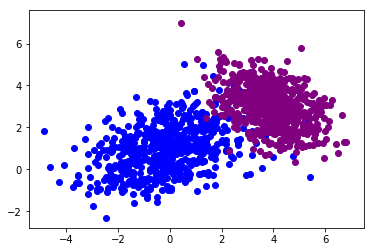

In [83]:
plt.figure()
plt.scatter(dist_01[:,0],dist_01[:,1],color="blue")
plt.scatter(dist_02[:,0],dist_02[:,1],color="purple")
plt.show()


In [84]:
datapoint=np.zeros((dist_01.shape[0]+dist_02.shape[0],dist_01.shape[1]))
print(datapoint.shape)
datapoint[:dist_01.shape[0]]=dist_01
datapoint[dist_01.shape[0]:]=dist_02
datapoint[dist_01.shape[0]:605]

(1200, 2)


array([[3.03203612, 3.18633959],
       [6.73808544, 1.3150213 ],
       [2.81521767, 3.44517225],
       [3.58773341, 2.57609549],
       [2.36679518, 2.80694378]])

## KMeansClustering - Application of Oops

### Cluster::
    - this class has some attribute
    > centre of cluster
    > Color of cluster (It change according of dataset)
    > Cluster has list - points of dataset belong to cluster

In [85]:
class cluster:
    def __init__(self,k,center,color):
        self.k=k;
        self.center=center
        self.color=color
        self.points=list()
    
    def __str__(self):   #this work with priint function #does'nt return this return  statement 
        return "Cluster < {} >".format(self.color)
    
    def __repr__(self): #this return 
        return "Cluster <{}>".format(self.color)
    
    def UpdateCenter(self):
        if not self.points:
            return self.center
        
        newCenter=np.array(self.points).mean(axis=0)
        self.center=newCenter
        return newCenter

### KmeanCluster Class :
   . In this class Clusters are one attribute                         
   . List of inertia of every iteration after converge of center      
   . Dataset is total point present in the class                
   . k it is not compulsary

In [86]:
class KMeanClustering:
    
    #static method
    def Euclidean_Dist(p1,p2):
        return np.sqrt(np.sum((p1-p2)**2))
    
    def __init__(self,k,Clusters,datapoint,centers):
        self.k=k;
        self.clusters=Clusters
        self.datapoint=datapoint
        self.inertias=list()
        self.centers=centers
    
    def run(self,itration=1):
        for _ in range(itration):
            self.ClosestAssign()
            self.Update_cluster()
            self.inertias.append(self.CalInertia())
            
    def ClosestAssign(self):
        for cluster in self.clusters:
            cluster.points=list()
            
        for point in self.datapoint:
            distance=[]
            for cluster in self.clusters:
                dist=KMeanClustering.Euclidean_Dist(point,cluster.center)
                distance.append((dist,cluster))
            
            distance=sorted(distance,key=lambda s:s[0])
            NewCluster=distance[0][1]
            NewCluster.points.append(point)
            
    def Update_cluster(self):
        N_center=[]
        for cluster in self.clusters:
            N_center.append(cluster.UpdateCenter())
        self.centers=N_center
        
    def CalInertia(self):
        inertia_dist=0;
        for cluster in self.clusters:
            for point in cluster.points:
                inertia_dist+=KMeanClustering.Euclidean_Dist(point,cluster.center)
        return inertia_dist

In [142]:
k=6
random_center=np.random.uniform(low=datapoint.min(),high=datapoint.max(),size=(k,datapoint.shape[1]))
colors=['blue','purple','brown','cyan','yellow',"red"]


In [143]:
clusters=[]
for ctr,clr in zip(random_center,colors):
    clusters.append(cluster(k,ctr,clr))
clusters

[Cluster <blue>,
 Cluster <purple>,
 Cluster <brown>,
 Cluster <cyan>,
 Cluster <yellow>,
 Cluster <red>]

In [156]:
kmean=KMeanClustering(k,clusters,datapoint,random_center)


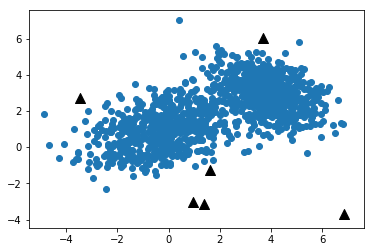

In [157]:
plt.figure()
plt.scatter(kmean.datapoint[:,0],kmean.datapoint[:,1])
pt_ct=np.array(kmean.centers)
plt.scatter(pt_ct[:,0],pt_ct[:,1],color="black",marker="^",s=100)
plt.show()

In [158]:
kmean

In [159]:
def Plot_KMeansPoint(KMeans,itr=1,brk=True):
    for i in range(itr):
        KMeans.run()
        plt.figure()
        plt.title("After {}th Mean Converge::".format(i+1))
        for cluster in KMeans.clusters:
            pt=np.array(cluster.points)
            plt.scatter(pt[:,0],pt[:,1],color=cluster.color)
            plt.scatter(cluster.center[0],cluster.center[1],color="black",marker="^",s=110)
        plt.show()
        if brk:
            input()
        

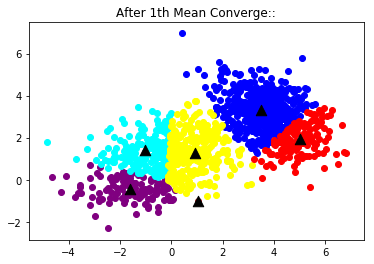

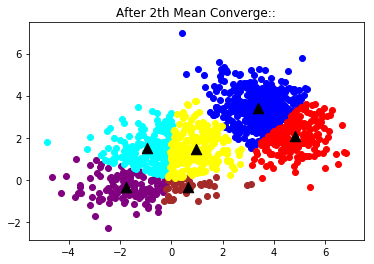

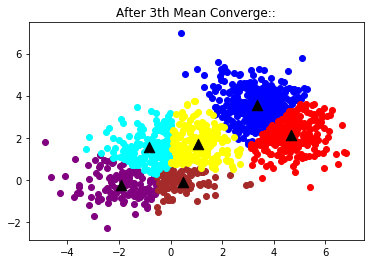

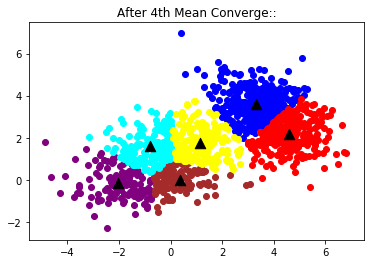

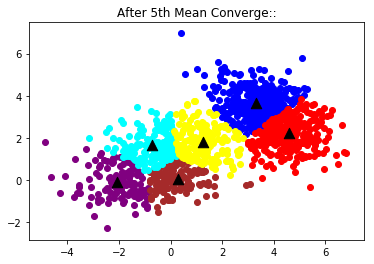

In [160]:

Plot_KMeansPoint(kmean,5,False)

#### Graph b/w inertia and No of times mean converge 

In [161]:
print(kmean.inertias)
kmean.centers

[1222.4596053488647, 1152.7208301903295, 1111.543631501991, 1098.0073133691392, 1093.2018834268056]


[array([3.29544932, 3.65127267]),
 array([-2.07279639, -0.11042011]),
 array([0.27273235, 0.05083359]),
 array([-0.7335165 ,  1.66597607]),
 array([1.26146941, 1.80461025]),
 array([4.58380795, 2.21456848])]

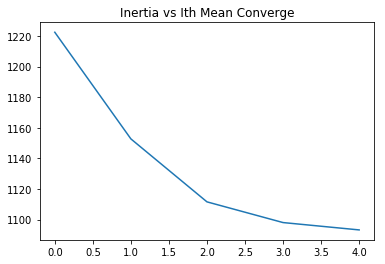

In [162]:
plt.figure()
plt.title("Inertia vs Ith Mean Converge")
plt.plot(kmean.inertias)
plt.show()